In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp gdrive/"My Drive"/dataset-rocky-all-feats.csv ./

# Test with sklearn

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
df = pd.read_csv('dataset-rocky-all-feats.csv')

In [0]:
df = df.drop('P. Habitable', axis=1)

In [0]:
nb = GaussianNB()

In [0]:
y = df['hab_lbl']

In [0]:
x = df.drop('hab_lbl', axis=1)

In [0]:
x.head()

,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Min Mass (EU),P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),...,S. Appar Mag,S. Mag from Planet,S. Size from Planet (deg),S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI
0,2,2,2,2,18.217914,8.10,1.99,1.03,2.05,2.02,...,6.0,-35.2,33.0178,0.591,1.419,-2.39,0.06,-0.81,0.28,0.26
1,2,2,3,2,5.090000,5.09,1.66,1.10,1.84,1.75,...,4.7,-32.9,10.0643,0.656,1.556,-2.35,-0.15,-0.69,0.29,0.27
2,2,4,3,3,1.140000,1.14,1.09,0.89,0.97,1.03,...,1.3,-33.0,11.5197,0.545,1.306,-2.33,-0.17,-1.12,0.28,0.30
3,2,2,3,2,11.770000,16.31,2.23,1.47,3.28,2.71,...,11.0,-29.7,2.0522,0.694,1.636,-1.96,-0.13,0.61,0.33,0.33
4,2,2,3,2,8.580000,8.58,1.91,1.23,2.35,2.12,...,6.7,-33.4,20.5046,0.735,1.832,-2.26,-0.14,-0.54,0.30,0.26


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
nb.score(x_test, y_test)

0.9863813229571985

In [0]:
preds = nb.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       501
           1       0.86      1.00      0.92         6
           2       0.50      0.86      0.63         7

   micro avg       0.99      0.99      0.99       514
   macro avg       0.79      0.95      0.85       514
weighted avg       0.99      0.99      0.99       514



## RandomForest

In [0]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [0]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00       514
   macro avg       1.00      1.00      1.00       514
weighted avg       1.00      1.00      1.00       514



## RF on data without STemp

In [0]:
df = pd.read_csv('dataset-rocky-no-STemp.csv')

In [0]:
df = df.drop('P. Habitable', axis=1)
y = df['hab_lbl']
x = df.drop('hab_lbl', axis=1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9980544747081712

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9980544747081712

In [0]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00         4
           2       0.92      1.00      0.96        12

   micro avg       1.00      1.00      1.00       514
   macro avg       0.97      1.00      0.99       514
weighted avg       1.00      1.00      1.00       514



## RF with reduced features

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-restricted-feat-set.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-restricted-feat-set.csv')

In [0]:
#df = df.drop('P. Habitable', axis=1)
y = df['hab_lbl']
x = df.drop('hab_lbl', axis=1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9961089494163424

In [0]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        12

   micro avg       1.00      1.00      1.00       514
   macro avg       0.97      0.94      0.96       514
weighted avg       1.00      1.00      1.00       514



# Back to Deep Learning!

In [0]:
from fastai import *
from fastai.tabular import *

In [0]:
from fastai.basics import *

In [0]:
df = pd.read_csv('dataset-rocky-all-feats.csv')

In [0]:
df = df.drop('P. Habitable', axis=1)

In [8]:
train_df, valid_df = train_test_split(df, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
def rebalance(frame, col='hab_lbl', factor=1):
    max_size = frame[col].value_counts().max()
    lst = [frame]
    for class_index, group in frame.groupby(col):
        lst.append(group.sample(int((max_size-len(group)) / factor), replace=True))
    frame_new = pd.concat(lst)
    
    return frame_new

In [0]:
train_df = rebalance(train_df)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3495 entries, 1655 to 1695
Data columns (total 45 columns):
hab_lbl                      3495 non-null int64
P. Zone Class                3495 non-null int64
P. Mass Class                3495 non-null int64
P. Composition Class         3495 non-null int64
P. Atmosphere Class          3495 non-null int64
P. Min Mass (EU)             3495 non-null float64
P. Mass (EU)                 3495 non-null float64
P. Radius (EU)               3495 non-null float64
P. Density (EU)              3495 non-null float64
P. Gravity (EU)              3495 non-null float64
P. Esc Vel (EU)              3495 non-null float64
P. SFlux Min (EU)            3495 non-null float64
P. SFlux Mean (EU)           3495 non-null float64
P. SFlux Max (EU)            3495 non-null float64
P. Teq Min (K)               3495 non-null float64
P. Teq Mean (K)              3495 non-null float64
P. Teq Max (K)               3495 non-null float64
P. Ts Min (K)                3495

In [0]:
cat_vars = train_df.columns[np.where(train_df.dtypes == 'int64')]

In [0]:
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [14]:
cat_vars

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [0]:
cont_vars = train_df.columns[np.where(train_df.dtypes == 'float64')]

In [0]:
cont_vars = cont_vars.tolist()

In [17]:
len(cont_vars) + len(cat_vars)

44

In [0]:
procs = [Normalize, Categorify]

In [36]:
valid_df.index

Int64Index([ 819,  260, 1506,  810, 1521,  655,  628, 1349, 1092, 1578,
            ...
             168,  719,  722,  635,  943,  706,  289,  492, 1639,  455],
           dtype='int64', length=514)

In [0]:
df = train_df.append(valid_df)

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(valid_df.index)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [39]:
data

TabularDataBunch;

Train: LabelList (3495 items)
x: TabularList
P. Zone Class 2; P. Mass Class 4; P. Composition Class 3; P. Atmosphere Class 2; P. Min Mass (EU) 0.5683; P. Mass (EU) -0.2160; P. Radius (EU) -1.3704; P. Density (EU) -0.0263; P. Gravity (EU) -0.1407; P. Esc Vel (EU) -0.8078; P. SFlux Min (EU) -0.0294; P. SFlux Mean (EU) -0.0296; P. SFlux Max (EU) -0.0298; P. Teq Min (K) -0.3911; P. Teq Mean (K) -0.4046; P. Teq Max (K) -0.4233; P. Ts Min (K) -0.4049; P. Ts Mean (K) -0.4184; P. Ts Max (K) -0.4372; P. Surf Press (EU) -0.0210; P. Mag 0.5914; P. Appar Size (deg) -1.3750; P. Period (days) -0.3135; P. Sem Major Axis (AU) -0.7372; P. Eccentricity -0.5222; P. Mean Distance (AU) -0.7253; P. Inclination (deg) 0.5318; P. Omega (deg) -0.4186; S. Mass (SU) -1.7375; S. Radius (SU) -1.5094; S. Teff (K) -1.6315; S. Luminosity (SU) -0.5451; S. [Fe/H] 1.0404; S. Age (Gyrs) -2.0998; S. Appar Mag 2.5068; S. Mag from Planet 0.2716; S. Size from Planet (deg) 0.0621; S. Hab Zone Min (AU) -1.079

In [40]:
data.cat_names

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [41]:
data.classes

[0, 1, 2]

In [0]:
import fastai

In [0]:
# We want more than just L2, which is provided by fastai by default. So ps and 
# emb_drop adds dropout regularization
learn = tabular_learner(data, layers=[1000,500], ps=[0.01,0.1], emb_drop=0.04, metrics=fastai.basics.accuracy)

In [44]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(7, 5)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=56, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.01)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=500, out_features=3, bias=True)
  )
)

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


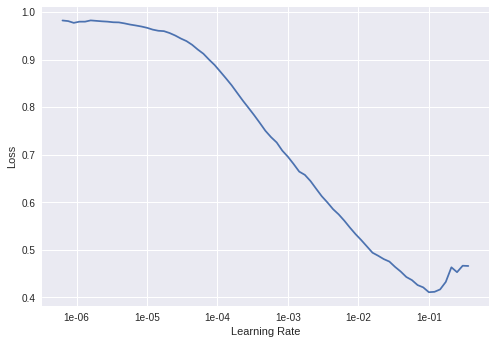

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
1,0.162770,0.046883,0.982490,00:00
2,0.067916,0.017575,0.996109,00:00
3,0.042723,0.045083,0.994163,00:00
4,0.026991,0.102021,0.996109,00:00
5,0.013489,0.032054,0.998055,00:00
6,0.007106,0.036595,0.998055,00:00
7,0.002722,0.036981,0.998055,00:00
8,0.001422,0.038002,0.998055,00:00
9,0.000709,0.039544,0.998055,00:00
10,0.000750,0.039577,0.998055,00:00


In [0]:
interp = learn.interpret()

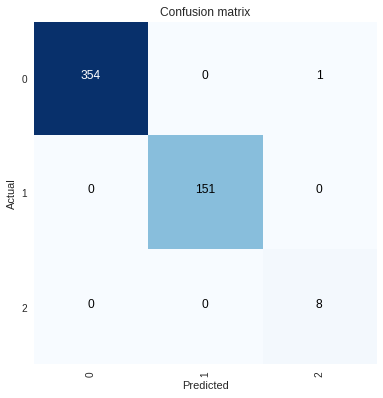

In [49]:
interp.plot_confusion_matrix()

In [0]:
matrix = interp.confusion_matrix()

In [51]:
matrix

array([[354,   0,   1],
       [  0, 151,   0],
       [  0,   0,   8]])

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
def get_metrics(matrix):
    preds = []
    targs = []
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            for k in range(matrix[i][j]):
                targs.append(i)
                preds.append(j)
    
    print('Accuracy score:', accuracy_score(targs, preds))
    print('Class-wise accuracy:')
    print([matrix[i][i] for i in range(len(matrix))] / np.sum(matrix, axis=1))
    print('Classification report:')
    print(classification_report(targs, preds))

In [54]:
get_metrics(matrix)

Accuracy score: 0.9980544747081712
Class-wise accuracy:
[0.997183 1.       1.      ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       151
           2       0.89      1.00      0.94         8

   micro avg       1.00      1.00      1.00       514
   macro avg       0.96      1.00      0.98       514
weighted avg       1.00      1.00      1.00       514



## Only 6 features

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-restricted-feat-set.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-restricted-feat-set.csv')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 7 columns):
hab_lbl               1713 non-null int64
P. Min Mass (EU)      1713 non-null float64
P. Mass (EU)          1713 non-null float64
P. Radius (EU)        1713 non-null float64
P. SFlux Min (EU)     1713 non-null float64
P. SFlux Mean (EU)    1713 non-null float64
P. SFlux Max (EU)     1713 non-null float64
dtypes: float64(6), int64(1)
memory usage: 93.8 KB


In [151]:
train_df, valid_df = train_test_split(df, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 120 to 672
Data columns (total 7 columns):
hab_lbl               1199 non-null int64
P. Min Mass (EU)      1199 non-null float64
P. Mass (EU)          1199 non-null float64
P. Radius (EU)        1199 non-null float64
P. SFlux Min (EU)     1199 non-null float64
P. SFlux Mean (EU)    1199 non-null float64
P. SFlux Max (EU)     1199 non-null float64
dtypes: float64(6), int64(1)
memory usage: 74.9 KB


In [0]:
train_df = rebalance(train_df, factor=2)

In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 120 to 1709
Data columns (total 7 columns):
hab_lbl               2341 non-null int64
P. Min Mass (EU)      2341 non-null float64
P. Mass (EU)          2341 non-null float64
P. Radius (EU)        2341 non-null float64
P. SFlux Min (EU)     2341 non-null float64
P. SFlux Mean (EU)    2341 non-null float64
P. SFlux Max (EU)     2341 non-null float64
dtypes: float64(6), int64(1)
memory usage: 146.3 KB


In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [156]:
cat_vars

[]

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]
cont_vars = cont_vars.tolist()

In [0]:
df = train_df.append(valid_df)

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(valid_df.index)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [160]:
data

TabularDataBunch;

Train: LabelList (2341 items)
x: TabularList
P. Min Mass (EU) 0.2945; P. Mass (EU) -0.1436; P. Radius (EU) -0.3456; P. SFlux Min (EU) -0.0342; P. SFlux Mean (EU) -0.0343; P. SFlux Max (EU) -0.0346; ,P. Min Mass (EU) -0.4424; P. Mass (EU) -0.1451; P. Radius (EU) -0.3673; P. SFlux Min (EU) -0.0332; P. SFlux Mean (EU) -0.0333; P. SFlux Max (EU) -0.0335; ,P. Min Mass (EU) 0.2945; P. Mass (EU) -0.1711; P. Radius (EU) -0.6497; P. SFlux Min (EU) 0.1282; P. SFlux Mean (EU) 0.1347; P. SFlux Max (EU) 0.1413; ,P. Min Mass (EU) 0.2945; P. Mass (EU) 0.2071; P. Radius (EU) 1.2403; P. SFlux Min (EU) -0.0304; P. SFlux Mean (EU) -0.0305; P. SFlux Max (EU) -0.0308; ,P. Min Mass (EU) 0.2945; P. Mass (EU) -0.1214; P. Radius (EU) -0.1500; P. SFlux Min (EU) -0.0169; P. SFlux Mean (EU) -0.0170; P. SFlux Max (EU) -0.0173; 
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (514 items)
x: TabularList
P. Min Mass (EU) 0.2945; P. Mass (EU) 0.0022; P. Radius (EU) 0.5668; P. SFlux Min (EU) -0.

In [0]:
learn = tabular_learner(data, layers=[100], ps=[0.5], metrics=fastai.basics.accuracy)

In [162]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [163]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


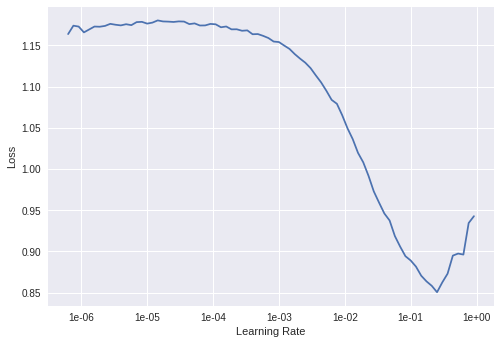

In [164]:
learn.recorder.plot()

In [165]:
learn.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
1,1.126819,1.028230,0.838521,00:00
2,1.003988,0.940393,0.885214,00:00
3,0.806155,0.778563,0.935798,00:00
4,0.650060,0.674890,0.875486,00:00
5,0.556479,0.588599,0.832685,00:00
6,0.497262,0.449648,0.894942,00:00
7,0.463753,0.434684,0.929961,00:00
8,0.445947,0.500656,0.752918,00:00
9,0.435613,0.521310,0.700389,00:00
10,0.432034,0.505124,0.758755,00:00


In [0]:
mainterp = learn.interpret()

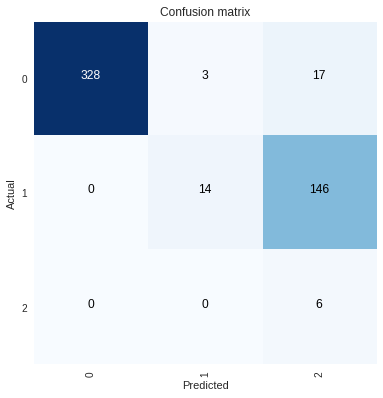

In [167]:
interp.plot_confusion_matrix()

In [168]:
get_metrics(interp.confusion_matrix())

Accuracy score: 0.6770428015564203
Class-wise accuracy:
[0.942529 0.0875   1.      ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       348
           1       0.82      0.09      0.16       160
           2       0.04      1.00      0.07         6

   micro avg       0.68      0.68      0.68       514
   macro avg       0.62      0.68      0.40       514
weighted avg       0.93      0.68      0.71       514



## Without surface temp

In [0]:
!cp gdrive/"My Drive"/dataset-rocky-no-STemp.csv ./

In [0]:
df = pd.read_csv('dataset-rocky-no-STemp.csv')

In [0]:
df = df.drop('P. Habitable', axis=1)

In [176]:
train_df, valid_df = train_test_split(df, train_size=0.7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
train_df = rebalance(train_df)

In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3504 entries, 1627 to 1712
Data columns (total 42 columns):
hab_lbl                      3504 non-null int64
P. Zone Class                3504 non-null int64
P. Mass Class                3504 non-null int64
P. Composition Class         3504 non-null int64
P. Atmosphere Class          3504 non-null int64
P. Min Mass (EU)             3504 non-null float64
P. Mass (EU)                 3504 non-null float64
P. Radius (EU)               3504 non-null float64
P. Density (EU)              3504 non-null float64
P. Gravity (EU)              3504 non-null float64
P. Esc Vel (EU)              3504 non-null float64
P. SFlux Min (EU)            3504 non-null float64
P. SFlux Mean (EU)           3504 non-null float64
P. SFlux Max (EU)            3504 non-null float64
P. Teq Min (K)               3504 non-null float64
P. Teq Mean (K)              3504 non-null float64
P. Teq Max (K)               3504 non-null float64
P. Surf Press (EU)           3504

In [0]:
cat_vars = df.columns[np.where(df.dtypes == 'int64')]
cat_vars = cat_vars.tolist()
cat_vars.remove('hab_lbl')

In [180]:
cat_vars

['P. Zone Class',
 'P. Mass Class',
 'P. Composition Class',
 'P. Atmosphere Class']

In [0]:
cont_vars = df.columns[np.where(df.dtypes == 'float64')]
cont_vars = cont_vars.tolist()

In [204]:
len(cont_vars)

37

In [0]:
df = train_df.append(valid_df)

In [0]:
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(valid_df.index)
                   .label_from_df(cols='hab_lbl')
                   .databunch())

In [184]:
data

TabularDataBunch;

Train: LabelList (3504 items)
x: TabularList
P. Zone Class 2; P. Mass Class 2; P. Composition Class 3; P. Atmosphere Class 2; P. Min Mass (EU) 0.5419; P. Mass (EU) -0.0534; P. Radius (EU) 0.3282; P. Density (EU) 0.0202; P. Gravity (EU) 0.0328; P. Esc Vel (EU) 0.1726; P. SFlux Min (EU) -0.0336; P. SFlux Mean (EU) -0.0336; P. SFlux Max (EU) -0.0335; P. Teq Min (K) -0.0797; P. Teq Mean (K) -0.0283; P. Teq Max (K) 0.0333; P. Surf Press (EU) -0.0332; P. Mag -0.4375; P. Appar Size (deg) 0.3200; P. Period (days) -0.5152; P. Sem Major Axis (AU) -0.6963; P. Eccentricity 0.9188; P. Mean Distance (AU) -0.7048; P. Inclination (deg) -1.6607; P. Omega (deg) -0.4495; S. Mass (SU) -0.3328; S. Radius (SU) -0.3545; S. Teff (K) -0.5917; S. Luminosity (SU) -0.4373; S. [Fe/H] 0.1323; S. Age (Gyrs) 0.2478; S. Appar Mag 0.4272; S. Mag from Planet -0.3471; S. Size from Planet (deg) 0.1043; S. Hab Zone Min (AU) -0.6074; S. Hab Zone Max (AU) -0.5917; P. HZD -0.4592; P. HZC -0.0756; P. HZA -0.

In [0]:
learn = tabular_learner(data, layers=[10,5], ps=[0.001,0.01], emb_drop=0.04, metrics=fastai.basics.accuracy)

In [186]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(5, 4)
    (1): Embedding(7, 5)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(37, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=53, out_features=10, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=5, out_features=3, bias=True)
  )
)

In [187]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


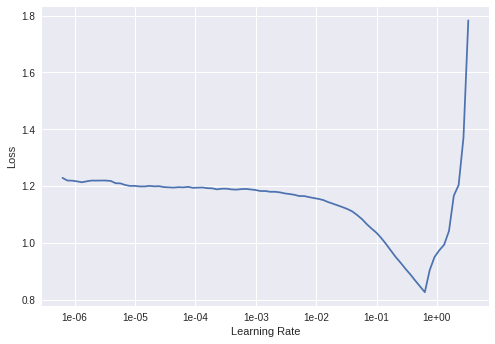

In [188]:
learn.recorder.plot()

In [190]:
learn.fit_one_cycle(10, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
1,1.075968,1.165339,0.206226,00:00
2,0.739232,0.355051,0.984436,00:00
3,0.313876,0.012350,1.000000,00:00
4,0.128372,0.033806,0.996109,00:00
5,0.054010,0.013842,1.000000,00:00
6,0.027293,0.001951,1.000000,00:00
7,0.014194,0.001255,1.000000,00:00
8,0.009481,0.001139,1.000000,00:00
9,0.006119,0.001114,1.000000,00:00
10,0.004129,0.001363,1.000000,00:00


In [0]:
interp = learn.interpret()

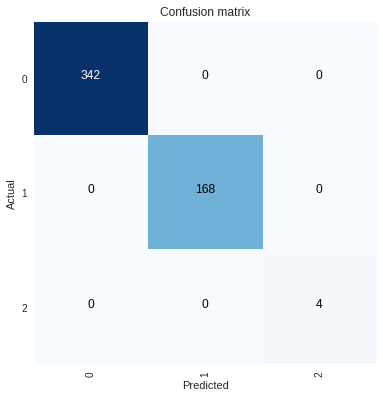

In [192]:
interp.plot_confusion_matrix()

In [193]:
get_metrics(interp.confusion_matrix())

Accuracy score: 1.0
Class-wise accuracy:
[1. 1. 1.]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00       514
   macro avg       1.00      1.00      1.00       514
weighted avg       1.00      1.00      1.00       514

